<a href="https://colab.research.google.com/github/marquesgabi/Doutorado/blob/master/PSD_histogram_CNN_B_Amostra8_r_squared_set_9_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7 MB 4.3 MB/s 


In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip' 
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 434, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (183/183), done.
remote: Total 434 (delta 82), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (434/434), 202.94 MiB | 25.75 MiB/s, done.
Resolving deltas: 100% (199/199), done.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
labels =[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)
print(labels)

['Fotos_Grandes-3cdAmostra/Q6-8-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-1.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-1.jpg', 'Fotos_Grandes-3cdAmostr

In [7]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[9] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [8]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 22.30 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [9]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [10]:
df=Segmenta(img)
Img_Size = 28

In [11]:
print(df)

    Width           0           1  ...         781         782         783
0     197    0.471154    0.764797  ...   96.021523   95.115524   89.676781
1     140   94.959999   96.439995  ...   78.279999   73.159996   62.680000
2     115   74.795998   74.701469  ...   79.840370   76.531113   68.005592
3     149   51.697990   72.187607  ...   84.707626   89.328186   87.429535
4     189   22.331963   16.282579  ...   81.403297   79.497948   78.716049
5     178   49.837021   55.419144  ...    6.601819    7.067290    6.413332
6     149   67.923752   73.401062  ...  113.565025  103.040596   88.591141
7     113   93.094521   95.671394  ...   19.002975   10.417809    2.423761
8     146   95.332703   94.612122  ...   85.997932   90.742348   93.488464
9     177   56.618465   56.375050  ...   75.360840   86.687851   90.714279
10    198   74.058037   80.491066  ...    4.831038    4.695337    4.412509
11    137  112.669395  114.286324  ...    7.054718    7.352709    7.094091
12    163   85.147202   8

In [12]:
'''
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)
'''

"\n!git clone https://github.com/ucfilho/MarquesGabi_Routines\n%cd MarquesGabi_Routines\n# filename = 'model_ANN.pkl'\nfilename = 'model_ANN_new.pkl'\nmodel = joblib.load(filename)\n"

In [13]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 21.33 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [14]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [15]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [16]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 64, 128, 256 '
N1 = 20
N2 = 20

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:

# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 2s 74ms/step - loss: 0.5844 - accuracy: 0.7318 - val_loss: 0.6931 - val_accuracy: 0.5714
Epoch 2/200
11/11 [==============================] - 1s 53ms/step - loss: 0.3144 - accuracy: 0.8717 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 3/200
11/11 [==============================] - 1s 51ms/step - loss: 0.1917 - accuracy: 0.9242 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 4/200
11/11 [==============================] - 1s 52ms/step - loss: 0.1102 - accuracy: 0.9534 - val_loss: 0.6930 - val_accuracy: 0.4898
Epoch 5/200
11/11 [==============================] - 1s 50ms/step - loss: 0.1360 - accuracy: 0.9446 - val_loss: 0.6930 - val_accuracy: 0.4898
Epoch 6/200
11/11 [==============================] - 1s 52ms/step - loss: 0.1136 - accuracy: 0.9679 - val_loss: 0.6925 - val_accuracy: 0.5102
Epoch 7/200
11/11 [==============================] - 1s 51ms/step - loss: 0.0656 - accuracy: 0.9738 - val_loss: 0.6925 - val_accuracy: 0.5102
Epoch 

In [18]:
Y_test = yback(Y_test)

In [19]:
pred_test= model.predict(X_test)
Rows, Cols = pred_test.shape
Prediction =[]
for i in range(Rows):
  if(pred_test[0,0] > pred_test[0,1]):
    Prediction.append(0)
  else:
    Prediction.append(1)
  


data = {'y_true': Y_test,'y_predict': Prediction}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   1
Actual     
0        72
1        75


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
#pred_test

In [21]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[9] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  prediction_02 = model.predict(result)
  Rows, Cols = prediction_02.shape
  Prediction =[]
  for i in range(Rows):
    if(prediction_02[0,0] > prediction_02[0,1]):
      Prediction.append(0)
    else:
      Prediction.append(1)
  loc_grao =[];k=0
  for i in Prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

    Width           0           1  ...         781         782         783
0   119.0   88.387543   91.826996  ...   74.737022   61.657440   57.685123
1   158.0   73.140839   72.573631  ...  100.230255   96.581787   92.794891
2   119.0   75.975777   77.899658  ...   87.363319   88.743950   89.961937
3   120.0   67.971115   67.234444  ...   83.311119   91.075554   94.491119
4   188.0   94.818924   93.645088  ...    5.626075    5.927116    5.813490
5   179.0   73.168381   71.546204  ...   88.408356  105.161850  112.133354
6   193.0   47.278904   49.222424  ...   28.186420   19.086607    5.140944
7   169.0   54.477852   66.980637  ...   59.777664   60.347183   63.271519
8   183.0   94.720085  102.316612  ...   64.737465   74.837112   86.345253
9   189.0   91.817566   90.218102  ...   39.663925   25.208504   17.545954
10  179.0   28.828722   29.482946  ...   92.308571   93.453827   96.452675
11  107.0   72.577080   60.620232  ...   57.085243   57.620667   56.919296
12  135.0   26.634182   2

In [22]:
Width=np.array(Width_new)

In [23]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 687, done.
remote: Counting objects: 100% (448/448), done.
remote: Compressing objects: 100% (446/446), done.
remote: Total 687 (delta 282), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (687/687), 5.59 MiB | 6.35 MiB/s, done.
Resolving deltas: 100% (419/419), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [24]:
#!git clone https://github.com/ucfilho/marquesgabi_out_2020
!git clone https://github.com/marquesgabi/Doutorado

%cd Doutorado

PSD_imageJ = 'Amostra8.csv' 
PSD_new = pd.read_csv(PSD_imageJ,sep=';')
#encoding='utf8'
print(PSD_new.head(3))

Cloning into 'Doutorado'...
remote: Enumerating objects: 434, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (183/183), done.
remote: Total 434 (delta 82), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (434/434), 165.78 MiB | 26.30 MiB/s, done.
Resolving deltas: 100% (205/205), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/Doutorado
   Unnamed: 0   Area
0           1  0.807
1           2  1.407
2           3  1.177


In [25]:
PSD_new.shape

(99, 2)

In [26]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [27]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,119.0,88.387543,91.826996,91.577858,88.083046,84.487892,81.975777,77.422150,72.432533,72.685120,75.750870,77.588242,78.017303,79.307953,80.214531,84.020767,87.653984,95.470596,104.044991,113.449821,109.069206,86.083046,74.269890,73.553635,74.993080,76.844284,77.301033,77.519035,78.550179,87.349487,92.269897,94.740479,90.387543,83.346024,80.086502,75.830460,72.072670,72.463669,78.145325,80.474052,...,114.366791,113.515579,111.173012,112.889282,114.446365,114.162628,111.328720,110.788925,106.986160,98.557098,82.391006,62.930801,36.449829,39.307961,38.927338,40.941177,44.484432,44.920418,45.397923,47.813148,82.806229,99.740486,103.875435,104.871971,103.000000,105.830452,106.996536,106.650513,107.743942,106.269897,104.446365,106.217995,108.764709,106.667824,104.318329,99.778549,90.377167,74.737022,61.657440,57.685123
1,158.0,73.140839,72.573631,72.092125,73.680344,78.377022,86.444641,95.738014,99.084908,60.326229,26.012497,43.265984,68.918289,81.441269,86.572502,76.349945,47.230892,18.889278,16.501842,19.866367,33.714787,54.501202,70.488701,79.268867,82.078667,84.276886,83.584686,80.612244,79.952415,70.147728,69.654869,71.855949,72.995514,79.772636,85.496391,94.862198,94.209732,51.452976,40.655346,49.583561,...,58.676495,54.748596,51.425892,50.883030,52.455696,52.856270,54.450085,83.099022,95.907860,98.289528,95.749550,90.484688,38.410831,22.858517,13.134433,10.662394,16.331678,58.193554,68.853546,68.978531,63.964592,60.278961,59.079315,60.097099,63.697166,65.328308,60.157028,59.346256,55.809643,53.145649,50.252682,50.029003,50.011219,50.515625,53.826473,85.692833,97.942795,100.230255,96.581787,92.794891
2,119.0,75.975777,77.899658,81.065742,83.370239,83.830444,86.743950,90.287201,93.200699,95.574394,97.089966,101.705887,102.044983,67.851212,36.141869,49.930794,58.089966,58.522488,54.771629,50.235291,47.058823,43.664360,39.602077,37.010380,36.027679,37.519032,39.006924,43.411766,44.768166,75.297577,78.065742,80.276825,81.709343,81.948097,85.166092,89.484428,92.591690,93.595161,94.377167,97.913498,...,71.913498,73.595154,77.301041,80.913498,82.065750,81.885818,83.612457,84.795845,85.709343,87.543251,89.145332,90.861588,23.719723,26.778549,21.384085,19.397924,17.446369,13.404845,12.287198,13.692041,18.173012,33.903114,53.283737,63.581314,63.017300,68.608994,70.705879,69.972321,71.692047,74.743942,78.733566,82.152252,82.051910,81.830452,83.764709,84.602066,85.944633,87.363319,88.743950,89.961937
3,120.0,67.971115,67.234444,66.906662,64.957779,65.480003,68.602226,68.431114,69.265556,69.891113,68.481117,70.156670,76.336670,86.012222,92.984444,98.598892,85.156662,52.483337,45.442223,54.695553,87.077774,97.602234,98.172226,95.852226,91.186668,91.878891,90.774445,91.310005,93.155556,67.317780,66.163338,67.172226,65.479996,64.604446,67.624451,68.740005,68.611115,69.081116,67.589996,70.976669,...,48.381115,42.622223,36.618889,34.348892,33.320000,30.807779,31.980000,32.585556,43.627781,70.800003,86.944443,92.687782,91.692223,89.605560,89.427780,89.313332,89.014450,89.309998,91.029999,93.384445,92.882233,93.750000,97.241119,99.070000,102.301117,107.145554,106.158905,93.833336,67.535561,56.216667,52.531116,50.572224,45.877777,42.044445,39.483330,43.091114,62.942223,83.311119,91.075554,94.491119
4,188.0,94.818924,93.645088,94.982788,97.474876,88.727478,86.163414,88.798996,90.293335,96.276588,106.170212,121.123138,119.290169,54.325939,44.662746,43.568577,44.044815,46.091896,48.350838,52.278404,56.657307,71.106834,86.512909,93.315529,90.582603,85.511543,82.065178,73.312363,64.474419,93.229965,91.155273,93.779083,99.356270,93.641914,89.493881,87.764145,88.582153,93.436394,101.780441,115.311913,...,0.121775,0.489362,0.413309,0.526030,0.405161,0.299230,0.299230,0.433228,0.34

In [28]:
PSD_new.head()

,Unnamed: 0,Area
0,1,0.807
1,2,1.407
2,3,1.177
3,4,1.289
4,5,1.743


In [29]:
#lost_value = float(PSD_new.columns[1])

# Area = np.array(PSD_new.iloc[:,1])
Area = PSD_new['Area'].values
# Area = np.concatenate( (Area, [lost_value] ) )
# Area = np.concatenate( (Area, [lost_value] ) )
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [30]:
PSD_new

,Unnamed: 0,Area
0,1,0.807
1,2,1.407
2,3,1.177
3,4,1.289
4,5,1.743
...,...,...
94,28,2.097
95,29,1.871
96,30,1.315
97,31,1.034


In [31]:
PSD_new.iloc[:,1].values

array([0.807, 1.407, 1.177, 1.289, 1.743, 1.425, 2.553, 0.968, 1.43 ,
       0.722, 1.235, 1.058, 1.342, 1.207, 1.682, 1.474, 1.997, 1.187,
       2.082, 2.877, 1.386, 1.176, 0.96 , 1.147, 1.02 , 1.249, 1.704,
       1.602, 1.303, 1.707, 2.264, 1.233, 0.84 , 1.105, 1.343, 0.811,
       2.03 , 1.844, 2.266, 1.472, 1.009, 1.851, 0.941, 2.252, 1.269,
       1.082, 1.065, 1.995, 2.063, 0.969, 1.389, 1.721, 1.355, 1.178,
       1.529, 1.371, 1.423, 2.756, 0.854, 0.811, 0.69 , 1.752, 0.978,
       1.108, 1.149, 0.994, 1.594, 1.492, 1.322, 1.564, 1.29 , 1.057,
       1.193, 1.413, 1.477, 2.21 , 1.27 , 1.865, 1.088, 2.316, 1.855,
       0.882, 1.587, 1.075, 2.179, 1.749, 0.957, 1.24 , 1.586, 2.507,
       1.864, 1.281, 2.137, 1.282, 2.097, 1.871, 1.315, 1.034, 2.095])

In [32]:
X.shape

(490, 784)

<BarContainer object of 6 artists>

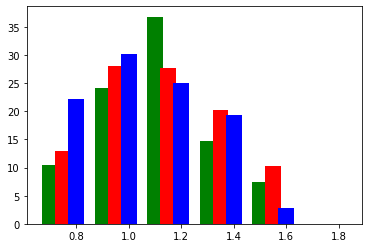

In [33]:
Freq = [10.52631579, 24.21052632, 36.84210526, 14.73684211,  7.36842105, 0.]
Freq2 = [12.90153, 28.11527, 27.66761, 20.21617, 10.34227, 0.]
Freq3 = [22.22489, 30.15078, 25.10463, 19.30926, 2.810434, 0.]
barWidth = 0.25

br1 = range(len(Freq))
# Set position of bar on X axis
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
labels = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8]

xx=[]
for a in labels:
  xx.append(str(a))
plt.bar(br1, Freq , color="green", align="center", width=0.3, tick_label= xx) 
plt.bar(br2, Freq2 , color="red", align="center", width=0.3, tick_label= xx)
plt.bar(br3, Freq3 , color="blue", align="center", width=0.3, tick_label= xx)

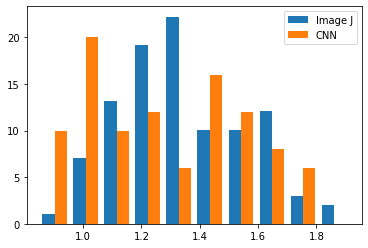

In [34]:
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts)
plt.legend(['Image J','CNN'])

(array([[0.01010101, 0.08080808, 0.21212121, 0.4040404 , 0.62626263,
         0.72727273, 0.82828283, 0.94949495, 0.97979798, 1.        ],
        [0.1       , 0.3       , 0.4       , 0.52      , 0.58      ,
         0.74      , 0.86      , 0.94      , 1.        , 1.        ]]),
 array([0.84917135, 0.95564675, 1.06212215, 1.16859754, 1.27507294,
        1.38154834, 1.48802374, 1.59449914, 1.70097453, 1.80744993,
        1.91392533]),
 <a list of 2 Lists of Patches objects>)

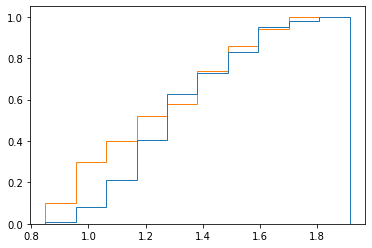

In [35]:
# plt.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,label='Reversed emp.')
plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')

r_squared = 0.9163033065124466


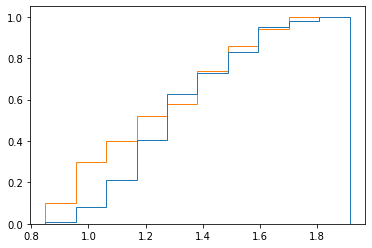

In [36]:
Obj = plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')
Y1, Y2 = Obj[0]
Rsquared = r2_score(Y1, Y2)
print('r_squared =',Rsquared)

In [37]:
acc_train = r.history['accuracy'][-1]
acc_test = r.history['val_accuracy'][-1]
loss_train = r.history['loss'][-1]
loss_test = r.history['val_loss'][-1]

In [38]:
df = pd.DataFrame({'N1':N1, 'N2':N2,'R^2':Rsquared,
                   'acc train':acc_train,'acc test':acc_test,
                   'loss train':loss_train,'loss test':loss_test,
                   'Details':Description},
                  index= [0])


In [39]:
df

,N1,N2,R^2,acc train,acc test,loss train,loss test,Details
0,200,10,0.916303,1.0,0.979592,0.00001,0.224399,"3 layers of Convolution: 32, 64, 128"


<a list of 2 Lists of Patches objects>
[0.84917135 0.95564675 1.06212215 1.16859754 1.27507294 1.38154834
 1.48802374 1.59449914 1.70097453 1.80744993 1.91392533]
[[ 1.01010101  7.07070707 13.13131313 19.19191919 22.22222222 10.1010101
  10.1010101  12.12121212  3.03030303  2.02020202]
 [10.         20.         10.         12.          6.         16.
  12.          8.          6.          0.        ]]


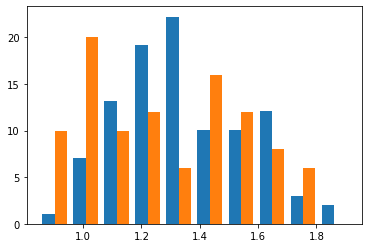

In [40]:
counts, bins, bars = plt.hist(X,weights=wts)
print(bars)
print(bins)
print(counts)

In [41]:
print(counts.sum())

200.00000000000003


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


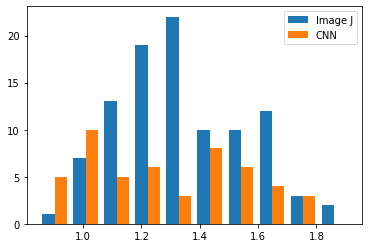

In [42]:

plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])


In [43]:
[Diam1,Diameter_All]

[[1.0136588738827657,
  1.3384498643738487,
  1.2241743928678164,
  1.2810955363139882,
  1.4897169283032898,
  1.3469841688927182,
  1.802936648279376,
  1.1101783096888704,
  1.349345229721172,
  0.9587903583676608,
  1.2539740179716348,
  1.1606409601292735,
  1.3071677279655385,
  1.2396774300177211,
  1.4634168627716928,
  1.369947111730825,
  1.5945718456175375,
  1.2293637946517857,
  1.6281537802488464,
  1.9139253303624628,
  1.3284238815238665,
  1.2236542422631285,
  1.1055812783082735,
  1.2084724894722394,
  1.1396070970426018,
  1.2610615335399848,
  1.4729562736988213,
  1.428191076384995,
  1.2880338220675407,
  1.474252319944901,
  1.697826354277848,
  1.2529582429827641,
  1.034176589165282,
  1.1861406733319428,
  1.3076546595257188,
  1.016167934339702,
  1.607692842495848,
  1.5322707725763225,
  1.6985761120332168,
  1.3690173884396646,
  1.1334454996327699,
  1.5351763407845973,
  1.09458595441189,
  1.6933208363283037,
  1.2711180048559307,
  1.1737313097142148,

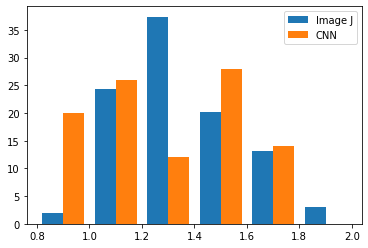

In [44]:
 bins_list = [0.8, 1.0, 1.2, 1.4,1.6, 1.8,2.0]
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts,bins = bins_list)
plt.legend(['Image J','CNN'])

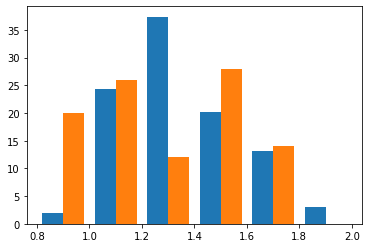

In [45]:
yy = plt.hist(X,weights=wts,bins = bins_list)

In [46]:
yy[0][0]

array([ 2.02020202, 24.24242424, 37.37373737, 20.2020202 , 13.13131313,
        3.03030303])

In [47]:
bins_list

[0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]

In [48]:
k =0
for kk in yy[0][0]:
  name = str(bins_list[k])
  df[name] = yy[0][1][k]
  k = k+1

In [49]:
df

,N1,N2,R^2,acc train,acc test,loss train,loss test,Details,0.8,1.0,1.2,1.4,1.6,1.8
0,200,10,0.916303,1.0,0.979592,0.00001,0.224399,"3 layers of Convolution: 32, 64, 128",20.0,26.0,12.0,28.0,14.0,0.0


In [50]:
Arq = "output.xlsx"
df.to_excel(Arq)
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>